In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("adult.csv", index_col=[0])
df = df[(df != "?").all(axis=1)]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [38]:
male = df[df["sex"] == "Male"]["sex"].count()
female = df[df["sex"] == "Female"]["sex"].count()

print(f"Male number: {male}")
print(f"Female number: {female}")

Male number: 20380
Female number: 9782


# Task 2
Find the average age of men in dataset

In [39]:
male = df[df["sex"] == "Male"]
male_avg = male["age"].mean()
print(f"AVG of male age is: {male_avg}")

AVG of male age is: 39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [41]:
people_from_poland = df[df['native-country'] == 'Poland']
percent = (len(people_from_poland) / df.shape[0]) * 100
print(f"People from Poland percent: {percent}")

People from Poland percent: 0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [53]:
std_under_50 = df.loc[df["salary"] == ">50K", "age"].std()
mean_under_50 = df.loc[df["salary"] == ">50K", "age"].mean()
print(std_under_50)
print(mean_under_50)
std_over_50 = df.loc[df["salary"] == "<=50K", "age"].std()
mean_over_50 = df.loc[df["salary"] == "<=50K", "age"].mean()
print(std_over_50)
print(mean_over_50)

10.269632835673852
43.95911028236548
13.464631257161633
36.60806038668668


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [57]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
no_high_edu = df.loc[~(df["education"].isin(higher_education))]
num_people = no_high_edu.loc[df["salary"] == ">50K"].shape[0]
print(f"People without high education and salary > 50K: {num_people}")

People without high education and salary > 50K: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [ ]:
age_education = df.groupby("education")["age"].describe()
print(age_education)

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [7]:
married = df.loc[df["marital-status"].str.startswith("Married"), "salary"].value_counts()
non_married = df.loc[~df["marital-status"].str.startswith("Married"), "salary"].value_counts()
print(non_married)
print(married)

salary
<=50K    14638
>50K      1068
Name: count, dtype: int64
salary
<=50K    8016
>50K     6440
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [10]:
max_hours = df["hours-per-week"].max()
print(f"Maximum hours: {max_hours}")
max_hours_people_count = df[df["hours-per-week"] == max_hours].shape[0]
print(f"People number, who are working max hours: {max_hours_people_count}")

Maximum hours: 99
People number, who are working max hours: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Axes(0.125,0.11;0.775x0.77)
                age  salary K$
age        1.000000   0.208203
salary K$  0.208203   1.000000


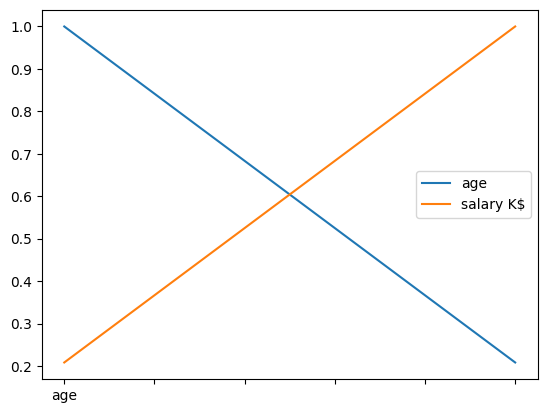

In [15]:
corr = df[["age", "salary K$"]].corr()
print(corr.plot())
print(corr)